# First look at the Fermi Photon Data 
Taken from 
https://www.nevis.columbia.edu/~santander/srmp/SRMP_Fermi.html
To do bash commands like pip install <package> do 
```bash

!pip install pyfits
!pip install pygcn

```

In [18]:
import numpy as np
import pylab as pl
#%matplotlib inline
%matplotlib notebook

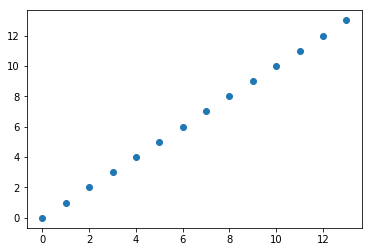

In [2]:
x = range(0,14)
pl.scatter(x,x)

In [3]:
import pyfits as pf

/Users/up/miniconda3/lib/python3.6/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


Open file using wget (copy link to one of the .fits files by right clicking) from https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/python_tutorial.html. 

In [4]:
!wget https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/data/pyLikelihood/L1504241622054B65347F25_PH00.fits 

--2018-03-19 19:30:31--  https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/data/pyLikelihood/L1504241622054B65347F25_PH00.fits
Resolving fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)... 129.164.179.26
Connecting to fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)|129.164.179.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11160000 (11M) [application/fits]
Saving to: 'L1504241622054B65347F25_PH00.fits'

L1504241622054B6534 100%[===================>]  10.64M  1.26MB/s    in 8.0s    

2018-03-19 19:30:40 (1.34 MB/s) - 'L1504241622054B65347F25_PH00.fits' saved [11160000/11160000]



In [5]:
h = pf.open("L1504241622054B65347F25_PH00.fits")

In [6]:
hdu, data, columns = h[1].header, h[1].data, h[1].columns

To get more information on the contents of the file do 
```python

print(hdu)

```

In [7]:
print(hdu) 

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   98 / width of table in bytes                        NAXIS2  =               113339 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                   23 / number of fields in each row                   TTYPE1  = 'ENERGY  '           / energy of event                                TFORM1  = 'E       '           / data format of field: 4-byte REAL              TTYPE2  = 'RA      '           / right ascension (J2000) of event               TFORM2  = 'E       '           / data format of field: 4-byte REAL              TTYPE3  = 'DEC     '           / declina

Let's see the column definitions. 

```python

print(columns)

```

In [8]:
print(columns)

ColDefs(
    name = 'ENERGY'; format = 'E'; unit = 'MeV'
    name = 'RA'; format = 'E'; unit = 'deg'
    name = 'DEC'; format = 'E'; unit = 'deg'
    name = 'L'; format = 'E'; unit = 'deg'
    name = 'B'; format = 'E'; unit = 'deg'
    name = 'THETA'; format = 'E'; unit = 'deg'
    name = 'PHI'; format = 'E'; unit = 'deg'
    name = 'ZENITH_ANGLE'; format = 'E'; unit = 'deg'
    name = 'EARTH_AZIMUTH_ANGLE'; format = 'E'; unit = 'deg'
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'EVENT_ID'; format = 'J'
    name = 'RUN_ID'; format = 'J'
    name = 'RECON_VERSION'; format = 'I'
    name = 'CALIB_VERSION'; format = '3I'
    name = 'EVENT_CLASS'; format = '32X'
    name = 'EVENT_TYPE'; format = '32X'
    name = 'CONVERSION_TYPE'; format = 'I'
    name = 'LIVETIME'; format = 'D'; unit = 's'
    name = 'DIFRSP0'; format = 'E'
    name = 'DIFRSP1'; format = 'E'
    name = 'DIFRSP2'; format = 'E'
    name = 'DIFRSP3'; format = 'E'
    name = 'DIFRSP4'; format = 'E'
)


# Energy (MeV)
The energies can be accessed as an array

In [9]:
data['ENERGY']

array([538.79675, 765.5338 , 391.90915, ..., 722.9538 , 274.50766,
       144.3101 ], dtype=float32)

In [12]:
ph_energies = data['ENERGY']
print("Energy of the first photon (MeV):", ph_energies[0])

Energy of the first photon (MeV): 538.79675


# Plotting the positions of the photons

Position and Energy and log scale. We make a cut on the energy > 1000. The plot will be declination (Dec in degrees) vs right ascension in (degrees). We later do it in 3D and you can interact with the plot by adding
```python 

%matplotlib notebook.

```
You have to comment out 
```python
%matplotlib inline 
```  
above. 


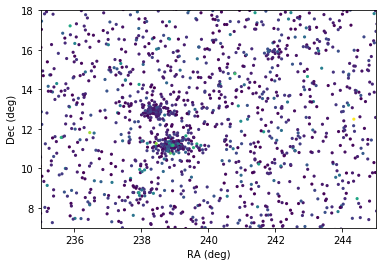

In [13]:
d = data[data['ENERGY'] > 1000]
pl.scatter(d['RA'], d['DEC'], s=10, c=np.log10(d['ENERGY']), linewidth=0)
pl.xlim(235,245)
pl.ylim(7,18)
pl.xlabel("RA (deg)")
pl.ylabel("Dec (deg)")

In [26]:
#%matplotlib notebook

<IPython.core.display.Javascript object>


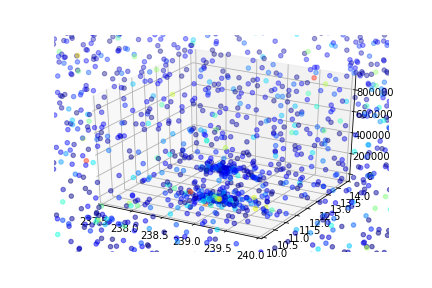

In [24]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(237.5,240)
ax.set_ylim(10,14)
ax.scatter(xs=d['RA'], ys=d['DEC'], zs=np.log10(d['ENERGY']), zdir='z', s=20, c=np.log10(d['ENERGY']), cmap=cm.jet, depthshade=True)

# Histogram of photon energies

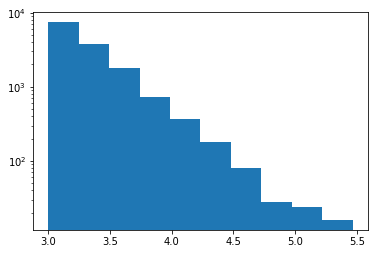

In [27]:
%matplotlib inline
pl.hist(np.log10(d['ENERGY']))
pl.yscale('log')

## Power-law spectral shapes in gamma-ray range
The number of photons detected is proportional to $E^-\gamma$, where $\gamma$ is the "spectral index", the slope of the spectrum and E is the energy of the photons. 

# Histogram of event times

Histos of events detected as a function of time could show the variability of a source. The variability seen here is not because of the source but because of the spacecraft pointing to and away from the source. 

Now let's generate a "light curve" (a curve of the number of photons we detect from specific sources as function of time).  


(array([1387., 1600., 1700., 1614., 1157., 1048., 1350., 1611., 1622.,
        1286.]),
 array([2.39559580e+08, 2.40426466e+08, 2.41293353e+08, 2.42160240e+08,
        2.43027127e+08, 2.43894013e+08, 2.44760900e+08, 2.45627787e+08,
        2.46494674e+08, 2.47361560e+08, 2.48228447e+08]),
 <a list of 10 Patch objects>)

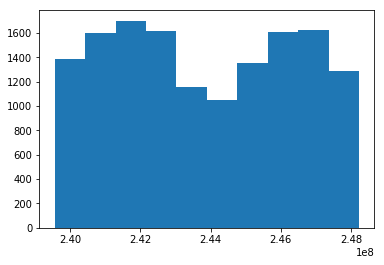

In [28]:
pl.hist(d['TIME'])